# 23_04_25_10_erythroid_lineage_下游分析6_尝试断点训练

In [1]:
import sys
sys.path = ["../.."] + sys.path # 切换到项目目录下

import scanpy as sc
import scvelo as scv
import velovgi

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


Global seed set to 0
/usr/local/conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/usr/local/conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
from torch_geometric import seed_everything

seed = 0
seed_everything(seed)

## 1. 数据读入

In [3]:
# 红系成熟部分
adata = scv.read("/mnt/h/F_bak/PyCode/xijing/notebook/data/Gastrulation/erythroid_lineage.h5ad")
sc.pp.subsample(adata, n_obs=500)
batch_key = "stage"
cluster_key = "celltype"
adata

AnnData object with n_obs × n_vars = 500 × 53801
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm'
    uns: 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

## 2. 预处理

In [4]:
batch_pair_list = None
batch_pair_list = [
    ["E7.0", "E7.25"],
    ["E7.25", "E7.5"],
    ["E7.5", "E7.75"],
    ["E7.75", "E8.0"],
    ["E8.0", "E8.25"],
    ["E8.25", "E8.5"],
]

In [5]:
knn_mask, bnn_mask, subsample_adata = velovgi.pp.preprocess(adata, sample_mode="random", batch_key=batch_key, batch_pair_list=batch_pair_list)

Filtered out 51490 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
calculating knn and bnn mask...
pair_list : [['E7.0', 'E7.25'], ['E7.25', 'E7.5'], ['E7.5', 'E7.75'], ['E7.75', 'E8.0'], ['E8.0', 'E8.25'], ['E8.25', 'E8.5']]


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


smoothing...
or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


## 3. 使用logger查看断点训练过程,看loss能不能连上

In [6]:
from pytorch_lightning import loggers

In [7]:
max_epochs = 30
sep=10

# max_epochs = 300
# sep=100

model_epoch_sep_savedir = "./tmp/model_epoch_sep"

1. 一次训练

In [8]:
# seed_everything(seed)

# velovgi.tl.VELOVGI.setup_anndata(adata=subsample_adata, spliced_layer="Ms", unspliced_layer="Mu")
# velovgi_model = velovgi.tl.VELOVGI(subsample_adata)

# name = "erythroid_lineage_%d_epoch"%max_epochs
# logger = loggers.TensorBoardLogger(save_dir="./tmp/log", name=name)
# velovgi_model.train(max_epochs=max_epochs, logger=logger)
# velovgi_model.save("%s/%s"%(model_epoch_sep_savedir, name))# 模型保存

初始训练，初始化runner参数
choosing neighbor minibatch


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: ./tmp/log/erythroid_lineage_30_epoch
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 30/30: 100%|██████████| 30/30 [00:14<00:00,  2.60it/s, loss=1.78e+06, v_num=0]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 30/30: 100%|██████████| 30/30 [00:14<00:00,  2.13it/s, loss=1.78e+06, v_num=0]


2. 断点训练，指定间隔数

In [9]:
# import math

# seed_everything(seed)

# velovgi.tl.VELOVGI.setup_anndata(adata=subsample_adata, spliced_layer="Ms", unspliced_layer="Mu")
# velovgi_model = velovgi.tl.VELOVGI(subsample_adata)

# for i in range(math.ceil(max_epochs/sep)):
#     print(i)
#     name = "erythroid_lineage_%dst_%d_epoch(max_epochs=%d)"%(i+1, sep, max_epochs)
#     logger = loggers.TensorBoardLogger(save_dir="./tmp/log", name=name) # 构造日志文件
#     velovgi_model.train(max_epochs=sep, logger=logger, checkpoint_mode="checkpoint")
#     velovgi_model.save("%s/%s"%(model_epoch_sep_savedir, name))# 模型保存

0
初始训练，初始化runner参数
choosing neighbor minibatch


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: ./tmp/log/erythroid_lineage_1st_10_epoch(max_epochs=30)
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 10/10: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s, loss=1.94e+06, v_num=0]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 10/10: 100%|██████████| 10/10 [00:04<00:00,  2.14it/s, loss=1.94e+06, v_num=0]
1
断点继续训练


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: ./tmp/log/erythroid_lineage_2st_10_epoch(max_epochs=30)
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 10/10: 100%|██████████| 10/10 [00:05<00:00,  2.11it/s, loss=1.85e+06, v_num=0]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 10/10: 100%|██████████| 10/10 [00:05<00:00,  1.97it/s, loss=1.85e+06, v_num=0]
2
断点继续训练


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: ./tmp/log/erythroid_lineage_3st_10_epoch(max_epochs=30)
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 10/10: 100%|██████████| 10/10 [00:04<00:00,  2.09it/s, loss=1.76e+06, v_num=0]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 10/10: 100%|██████████| 10/10 [00:04<00:00,  2.07it/s, loss=1.76e+06, v_num=0]


3. loss损失虽然不是完全一样的，还是比较近似的。以后可以拿中间的保存模型来查看模型输出的结果。但是epoch数量一旦多了，差距就很明显啦

## 4. 读取训练过程中模型，输出结果查看整体速率图和基因速率图

1. 读取

In [10]:
model_filename_list = []
model_list = []
for i in range(math.ceil(max_epochs/sep)):
    name = "erythroid_lineage_%dst_%d_epoch(max_epochs=%d)"%(i+1, sep, max_epochs)
    model = velovgi.tl.VELOVGI.load("%s/%s"%(model_epoch_sep_savedir, name), adata=adata, use_gpu=True)
    model_list.append(model)
model_list

INFO     File ./tmp/model_epoch_sep/erythroid_lineage_1st_10_epoch(max_epochs=30)/model.pt already downloaded      
INFO     File ./tmp/model_epoch_sep/erythroid_lineage_2st_10_epoch(max_epochs=30)/model.pt already downloaded      
INFO     File ./tmp/model_epoch_sep/erythroid_lineage_3st_10_epoch(max_epochs=30)/model.pt already downloaded      


VELOVGI Model with the following params: 
n_hidden: 256, n_latent: 10, n_layers: 1, dropout_rate: 0.1
Training status: Trained

VELOVGI Model with the following params: 
n_hidden: 256, n_latent: 10, n_layers: 1, dropout_rate: 0.1
Training status: Trained

VELOVGI Model with the following params: 
n_hidden: 256, n_latent: 10, n_layers: 1, dropout_rate: 0.1
Training status: Trained

[, , ]

2. 输出结果到adata里

In [11]:
adata_list = []
for model in model_list:
    tmp_adata = adata.copy()
    velovgi.tl.add_velovi_outputs_to_adata(tmp_adata, model)
    adata_list.append(tmp_adata)
adata_list

[AnnData object with n_obs × n_vars = 500 × 2000
     obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'is_sampled'
     var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling'
     uns: 'celltype_colors', 'neighbors', 'sample_recover', '_scvi_uuid', '_scvi_manager_uuid'
     obsm: 'X_pca', 'X_umap'
     layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'velocity_u', 'latent_time_velovi', 'fit_t'
     obsp: 'distances', 'connectivities',
 AnnData object with n_obs × n_vars = 500 × 2000
     obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'is_sampled'
     var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'sc

3. 绘制速率图

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing velocity graph (using 1/12 cores)


/usr/local/conda/envs/velovi-env/lib/python3.8/site-packages/ipykernel/comm/comm.py:79: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  warn(


  0%|          | 0/500 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


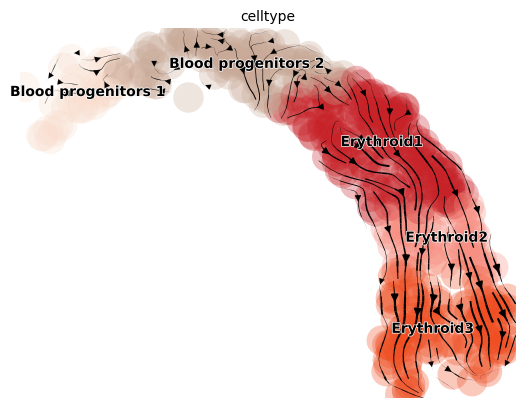

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing velocity graph (using 1/12 cores)


/usr/local/conda/envs/velovi-env/lib/python3.8/site-packages/ipykernel/comm/comm.py:79: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  warn(


  0%|          | 0/500 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


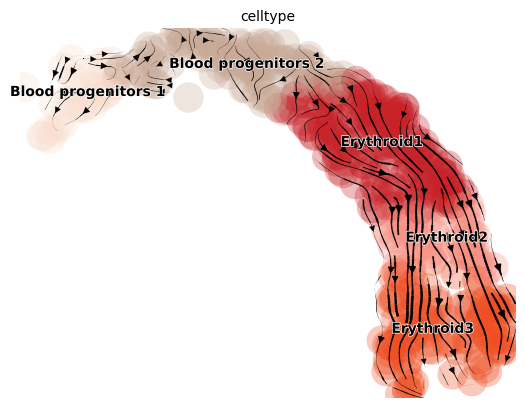

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing velocity graph (using 1/12 cores)


/usr/local/conda/envs/velovi-env/lib/python3.8/site-packages/ipykernel/comm/comm.py:79: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  warn(


  0%|          | 0/500 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


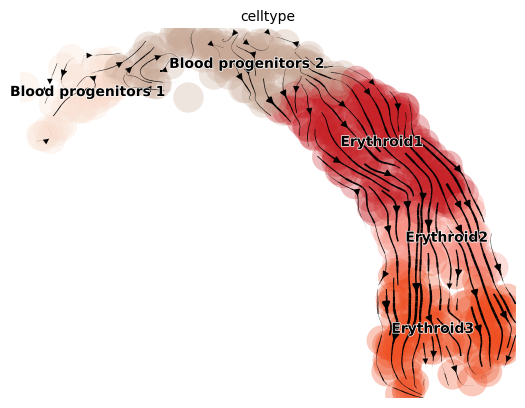

In [12]:
for tmp_adata in adata_list:
    scv.tl.velocity_graph(tmp_adata)
    # scv.pl.velocity_embedding(tmp_adata, color=cluster_key)
    scv.pl.velocity_embedding_stream(tmp_adata, color=cluster_key)

3. 查看基因的速率变化图

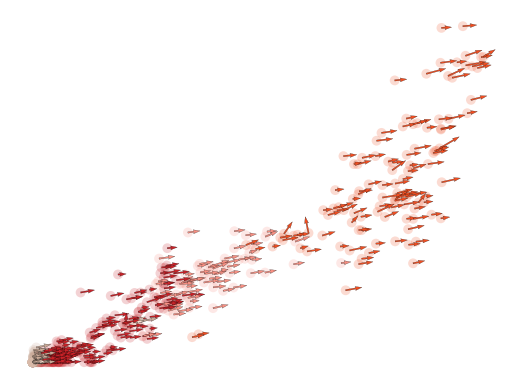

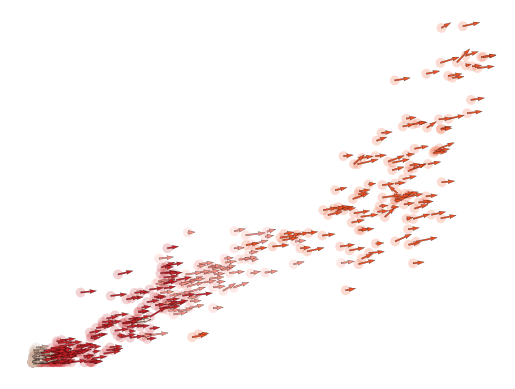

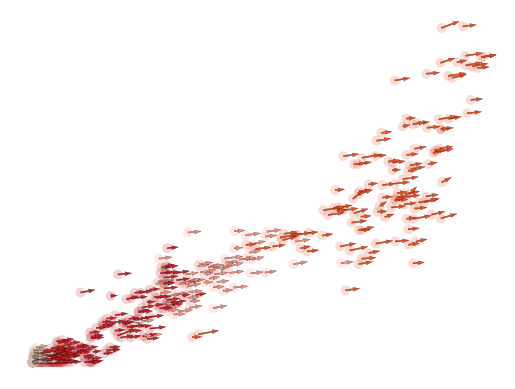

In [13]:
# basis = "Smim1" 
basis = "Hba-x"
for tmp_adata in adata_list:
    v_kwargs={'vkey': 'velocity', 'size': 200, 'frameon': False, 'title': '',
          'legend_loc': 'none', 'linewidth': .15, "angles": "uv", "arrow_length":100} # 这里绘制箭头的angles参数是发现bug的地方
    # tmp_adata.layers["velocity_u"] = tmp_adata.layers["velocity_u"].A
    scv.pl.velocity_embedding(tmp_adata, basis=basis, color=cluster_key, colorbar=True, **v_kwargs)